# Testing validity with IL Synthesis Dataset

## Import Synthesis Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
datasets_paths = ["./data/generatedDatasets/IL_dataset_"+ str(i)+".csv" for i in range(30)]
datasets_paths

['./data/generatedDatasets/IL_dataset_0.csv',
 './data/generatedDatasets/IL_dataset_1.csv',
 './data/generatedDatasets/IL_dataset_2.csv',
 './data/generatedDatasets/IL_dataset_3.csv',
 './data/generatedDatasets/IL_dataset_4.csv',
 './data/generatedDatasets/IL_dataset_5.csv',
 './data/generatedDatasets/IL_dataset_6.csv',
 './data/generatedDatasets/IL_dataset_7.csv',
 './data/generatedDatasets/IL_dataset_8.csv',
 './data/generatedDatasets/IL_dataset_9.csv',
 './data/generatedDatasets/IL_dataset_10.csv',
 './data/generatedDatasets/IL_dataset_11.csv',
 './data/generatedDatasets/IL_dataset_12.csv',
 './data/generatedDatasets/IL_dataset_13.csv',
 './data/generatedDatasets/IL_dataset_14.csv',
 './data/generatedDatasets/IL_dataset_15.csv',
 './data/generatedDatasets/IL_dataset_16.csv',
 './data/generatedDatasets/IL_dataset_17.csv',
 './data/generatedDatasets/IL_dataset_18.csv',
 './data/generatedDatasets/IL_dataset_19.csv',
 './data/generatedDatasets/IL_dataset_20.csv',
 './data/generatedDatas

In [3]:
def loadDataset(path):
    a = pd.read_csv(path)
    return a.drop(a.columns[0], axis=1)
def groupByRace(dataset):
    return dataset.groupby(by = ["race"])
def groupByFIPS(dataset):
    return dataset.groupby(by = ["FIPS"])
def groupByFIPSAndRace(dataset):
    return dataset.groupby(by = ["FIPS", "race"])

In [4]:
ILdataset = loadDataset(datasets_paths[0])

In [5]:
ILdataset.groupby(by = ["FIPS"]).FIPS.count()

FIPS
170010001001000     21
170010001001001      1
170010001001007     50
170010001001008    189
170010001001009     19
                  ... 
172030307003217      5
172030307003223      5
172030307003226      4
172030307003228     14
172030307003231      5
Name: FIPS, Length: 274520, dtype: int64

In [6]:
ILdataset.groupby(by = ["race"]).FIPS.count()

race
P1_003N    7870082
P1_004N    1808045
P1_005N      96539
P1_006N     753645
P1_007N       4506
            ...   
P1_066N         42
P1_067N         12
P1_068N          6
P1_069N         19
P1_071N         84
Name: FIPS, Length: 64, dtype: int64

In [11]:
ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])

count
FIPS            race          
170010001001000 P1_003N     20
                P1_004N      1
170010001001001 P1_003N      1
170010001001007 P1_003N     40
                P1_004N      3
...                        ...
172030307003223 P1_003N      5
172030307003226 P1_003N      4
172030307003228 P1_003N     14
172030307003231 P1_003N      4
                P1_015N      1

[813625 rows x 1 columns]

In [14]:
ILDatasetProcessed = pd.DataFrame(ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])).reset_index()
ILDatasetProcessed

,FIPS,race,count
0,170010001001000,P1_003N,20
1,170010001001000,P1_004N,1
2,170010001001001,P1_003N,1
3,170010001001007,P1_003N,40
4,170010001001007,P1_004N,3
...,...,...,...
813620,172030307003223,P1_003N,5
813621,172030307003226,P1_003N,4
813622,172030307003228,P1_003N,14
813623,172030307003231,P1_003N,4


## Import Real FIPS Data

In [6]:
from state import StateByBlockGroup
StateIL = StateByBlockGroup("17")
StateIL.decennialData

,GEO_ID,NAME,P1_001N,P1_001NA,P1_002N,P1_002NA,P1_003N,P1_003NA,P1_004N,P1_004NA,...,P1_069N,P1_069NA,P1_070N,P1_070NA,P1_071N,P1_071NA,state,county,tract,block
0,1000000US170010001001000,"Block 1000, Block Group 1, Census Tract 1, Ada...",17,NaN,17,NaN,16,NaN,1,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1000
1,1000000US170010001001001,"Block 1001, Block Group 1, Census Tract 1, Ada...",2,NaN,2,NaN,1,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1001
2,1000000US170010001001002,"Block 1002, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1002
3,1000000US170010001001003,"Block 1003, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1003
4,1000000US170010001001004,"Block 1004, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,1000000US172030307003228,"Block 3228, Block Group 3, Census Tract 307, W...",11,NaN,11,NaN,11,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3228
369974,1000000US172030307003229,"Block 3229, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3229
369975,1000000US172030307003230,"Block 3230, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3230
369976,1000000US172030307003231,"Block 3231, Block Group 3, Census Tract 307, W...",7,NaN,6,NaN,6,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3231


In [7]:
def processRealDataset(datasetdf):
    datasetdf["FIPS"] = datasetdf["GEO_ID"].map(lambda x: x[-15:])
    return datasetdf[["FIPS",
                'P1_003N', 'P1_004N', 'P1_005N', 'P1_006N', 'P1_007N',
                'P1_008N', 'P1_011N', 'P1_012N', 'P1_013N', 'P1_014N',
                'P1_015N', 'P1_016N', 'P1_017N', 'P1_018N', 'P1_019N',
                'P1_020N', 'P1_021N', 'P1_022N', 'P1_023N', 'P1_024N',
                'P1_025N', 'P1_027N', 'P1_028N', 'P1_029N', 'P1_030N',
                'P1_031N', 'P1_032N', 'P1_033N', 'P1_034N', 'P1_035N',
                'P1_036N', 'P1_037N', 'P1_038N', 'P1_039N', 'P1_040N',
                'P1_041N', 'P1_042N', 'P1_043N', 'P1_044N', 'P1_045N',
                'P1_046N', 'P1_048N', 'P1_049N', 'P1_050N', 'P1_051N',
                'P1_052N', 'P1_053N', 'P1_054N', 'P1_055N', 'P1_056N',
                'P1_057N', 'P1_058N', 'P1_059N', 'P1_060N', 'P1_061N',
                'P1_062N', 'P1_063N', 'P1_064N', 'P1_065N', 'P1_066N',
                'P1_067N', 'P1_068N', 'P1_069N', 'P1_071N'
            ]]

In [8]:
processedRealILDataset = processRealDataset(StateIL.decennialData)
processedRealILDataset

,FIPS,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_011N,P1_012N,P1_013N,...,P1_061N,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_071N
0,170010001001000,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,170010001001001,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,170010001001002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,170010001001003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,170010001001004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,172030307003228,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369974,172030307003229,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369975,172030307003230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369976,172030307003231,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Comparing the two datasets distributions

## By Races

In [137]:
popByRaceSynthesis = ILdataset.groupby(by = ["race"]).FIPS.count()
popByRaceSynthesis

race
P1_003N    7870082
P1_004N    1808045
P1_005N      96539
P1_006N     753645
P1_007N       4506
            ...   
P1_066N         42
P1_067N         12
P1_068N          6
P1_069N         19
P1_071N         84
Name: FIPS, Length: 64, dtype: int64

In [138]:
popByRaceReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 0)
popByRaceReal

P1_003N    7868227
P1_004N    1808271
P1_005N      96498
P1_006N     754878
P1_007N       4501
            ...   
P1_066N         35
P1_067N         14
P1_068N          4
P1_069N         15
P1_071N         84
Length: 64, dtype: int64

### Plot samples

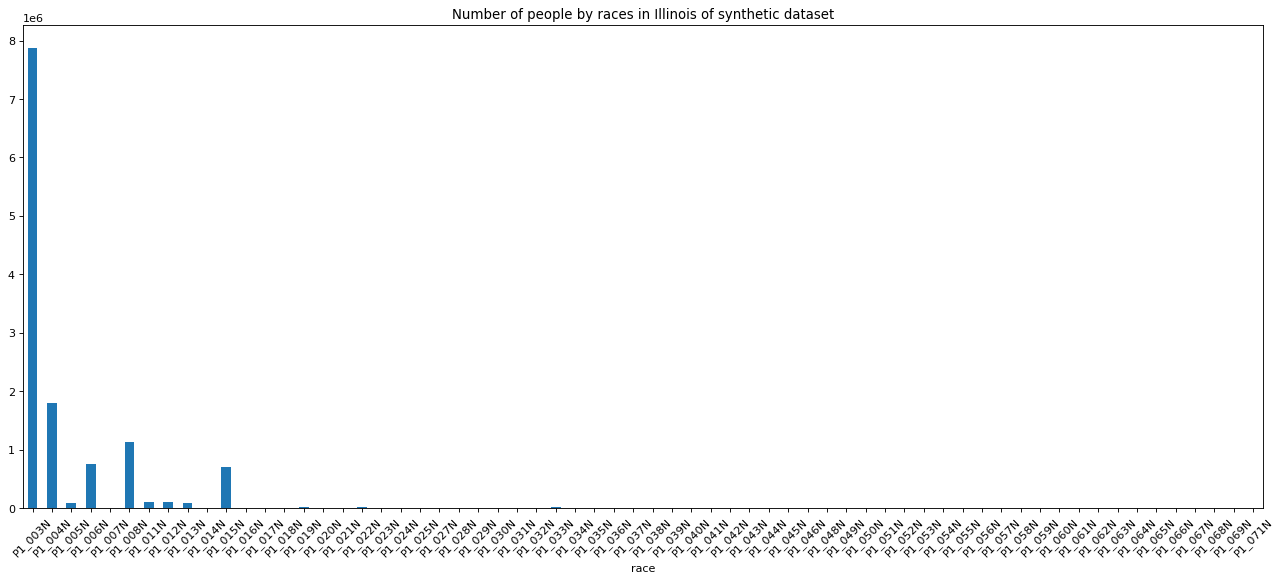

In [139]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceSynthesis.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

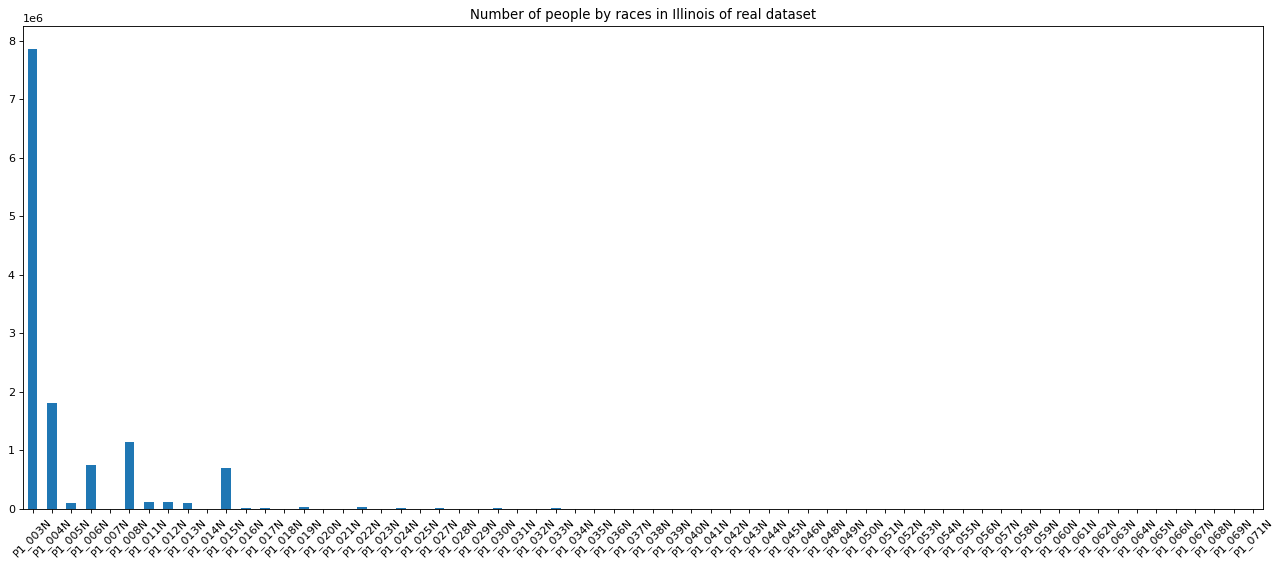

In [140]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceReal.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Compare mean and standard deviation

In [141]:
print("Mean of synthetic dataset", popByRaceSynthesis.mean())
print("Standard deviation of synthetic dataset", popByRaceSynthesis.std())

Mean of synthetic dataset 200195.4375
Standard deviation of synthetic dataset 1015965.0804909625


In [142]:
print("Mean of real dataset", popByRaceReal.mean())
print("Standard deviation of real dataset", popByRaceReal.std())

Mean of real dataset 200205.90625
Standard deviation of real dataset 1015765.3365417935


### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [143]:

# Perform the two sample t-test with equal variances
stats.ttest_ind(a=popByRaceSynthesis, b=popByRaceReal, equal_var=True)

Ttest_indResult(statistic=-5.8295325149161485e-05, pvalue=0.9999535792552408)

Due to p value = 0.9999535792552408 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [144]:
popByRaceReal.name = "Real"
popByRaceSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByRaceSynthesis, popByRaceReal, right_index = True,
               left_index = True)
mergeddf

,Synthesis,Real
race,,
P1_003N,7870082,7868227
P1_004N,1808045,1808271
P1_005N,96539,96498
P1_006N,753645,754878
P1_007N,4506,4501
...,...,...
P1_066N,42,35
P1_067N,12,14
P1_068N,6,4


In [145]:
stat, p, dof, expected = stats.chi2_contingency(mergeddf)
p

0.9999887328978065

In [146]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


Due to p value = 0.9908510047877276 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_1: $ The two datasets NOT come from the same ditribution 


In [147]:
stats.ks_2samp(popByRaceSynthesis, popByRaceReal)

KstestResult(statistic=0.046875, pvalue=0.9999999044253438)

Due to p value = 0.9999999044253438 >> 0.05. Therefore, there is no evidence to support the distributions of the two populations are not the same.

## By FIPS

In [10]:
popByFIPSSynthesis = ILdataset.groupby(by = ["FIPS"]).FIPS.count()
popByFIPSSynthesis = popByFIPSSynthesis.rename(lambda x: str(x))
popByFIPSSynthesis

FIPS
170010001001000     21
170010001001001      1
170010001001007     50
170010001001008    189
170010001001009     19
                  ... 
172030307003217      5
172030307003223      5
172030307003226      4
172030307003228     14
172030307003231      5
Name: FIPS, Length: 274520, dtype: int64

In [11]:
popByFIPSReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 1)
popByFIPSReal = popByFIPSReal.rename(processedRealILDataset['FIPS'])
popByFIPSReal

170010001001000    17
170010001001001     2
170010001001002     0
170010001001003     0
170010001001004     0
                   ..
172030307003228    11
172030307003229     0
172030307003230     0
172030307003231     7
172030307003232     0
Length: 369978, dtype: int64

### Plot samples

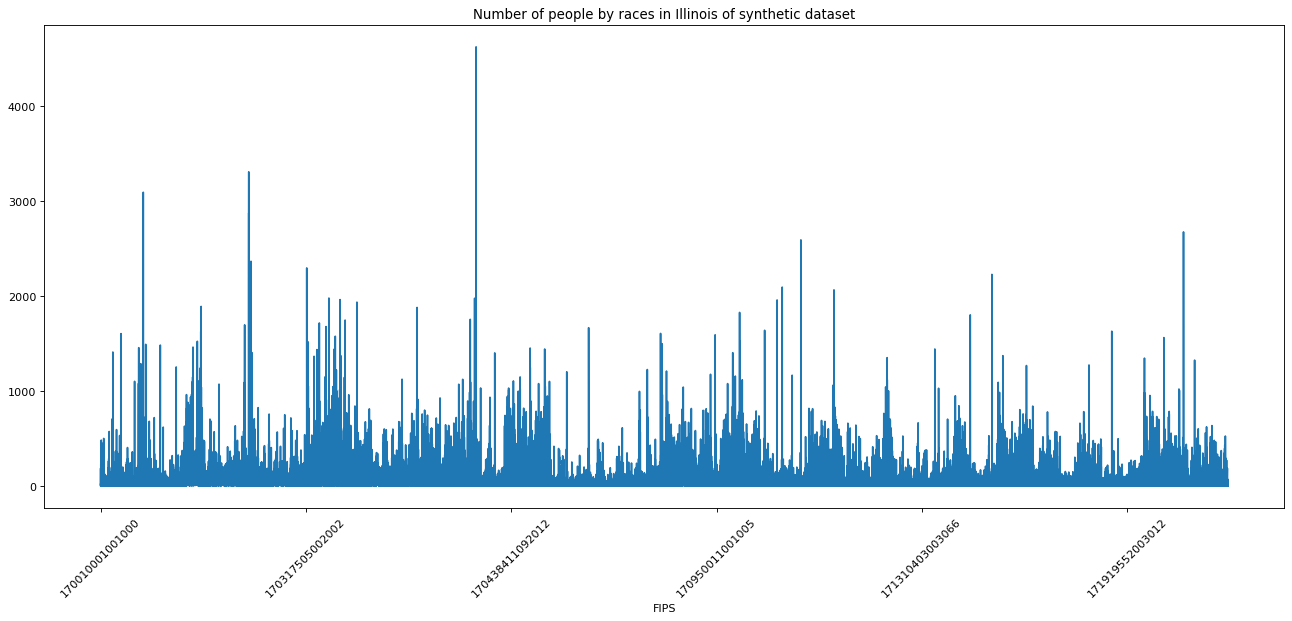

In [12]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSSynthesis.plot(x='FIPS', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

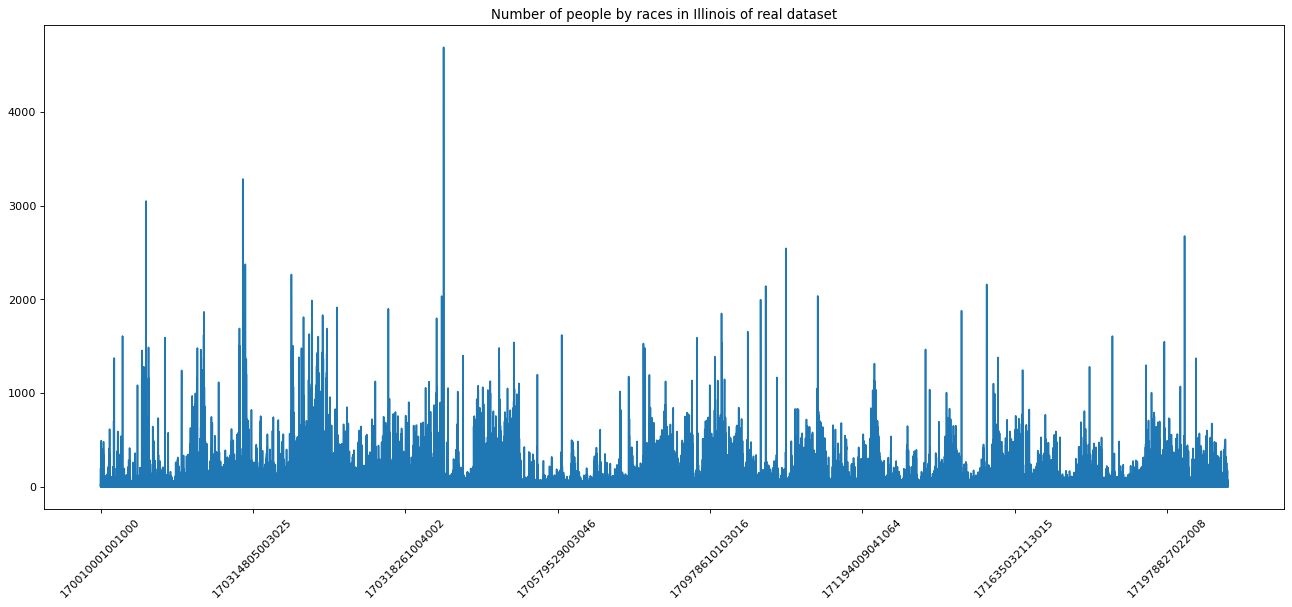

In [13]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSReal.plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [14]:
popByFIPSReal.name = "Real"
popByFIPSSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByFIPSSynthesis, popByFIPSReal, how= 'outer', right_index = True,
               left_index = True).fillna(0)
mergeddf = mergeddf.astype({'Synthesis': 'int32'})
mergeddf

,Synthesis,Real
170010001001000,21,17
170010001001001,1,2
170010001001002,0,0
170010001001003,0,0
170010001001004,0,0
...,...,...
172030307003228,14,11
172030307003229,0,0
172030307003230,0,0
172030307003231,5,7


### Compare mean and standard deviation

In [19]:
print("Mean of synthetic dataset", mergeddf["Synthesis"].mean())
print("Standard deviation of synthetic dataset", mergeddf["Synthesis"].std())

Mean of synthetic dataset 34.63045910837942
Standard deviation of synthetic dataset 68.0433708932947


In [20]:
print("Mean of real dataset", mergeddf["Real"].mean())
print("Standard deviation of real dataset", mergeddf["Real"].std())

Mean of real dataset 34.632270026866465
Standard deviation of real dataset 67.80617324548147


### Binning FIPS

In [24]:
N = 5
mergeddf.index = mergeddf.index.map(lambda x : int(x))
binningdf = mergeddf.groupby(mergeddf.index // N).sum()
binningdf

,Synthesis,Real
34002000200200,22,19
34002000200201,258,263
34002000200202,51,44
34002000200203,92,83
34002000200204,56,51
...,...,...
34406061400642,114,127
34406061400643,13,12
34406061400644,5,4
34406061400645,18,16


### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [25]:
ct = pd.crosstab(binningdf["Real"], binningdf["Synthesis"], margins=True)
ct

Synthesis,0,1,2,3,4,5,6,7,8,9,...,2724,2765,2890,3016,3093,3308,3527,3589,4905,All
Real,,,,,,,,,,,,,,,,,,,,,
0,3401,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3401
1,100,74,57,7,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,240
2,40,99,89,68,36,10,4,1,0,0,...,0,0,0,0,0,0,0,0,0,347
3,16,64,89,85,71,32,17,9,7,3,...,0,0,0,0,0,0,0,0,0,393
4,7,24,53,74,72,72,53,23,7,7,...,0,0,0,0,0,0,0,0,0,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [26]:
g, p, dof, expctd = stats.chi2_contingency(ct, lambda_="log-likelihood")

In [27]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(g) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [28]:
p

1.0

Due to p value = 1.0 >> 0.05.Therefore, there is no evidence to support the distributions of the two populations are not the same.

### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [31]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=binningdf["Synthesis"], b=binningdf["Real"], equal_var=True)

Ttest_indResult(statistic=-0.008248069195597552, pvalue=0.9934190781015679)

Due to p value = 0.9934190781015679 >> 0.05.Therefore, there is no evidence to support the population mean of the two populations are not the same.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_q: $ The two datasets NOT come from the same ditribution 


In [33]:
stats.ks_2samp(binningdf["Real"],binningdf["Synthesis"])

KstestResult(statistic=0.004258266423825777, pvalue=0.4781688122978446)

Due to p value = 0.4781688122978446 >> 0.05. Therefore, there is no evidence to support the two datasets NOT come from the same ditribution

## Benchmarking dataset

We will test the dataset by the 